<a href="https://colab.research.google.com/github/katyabik82/drozdova/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df=pd.read_csv ('HR.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.mode().dropna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


<Axes: >

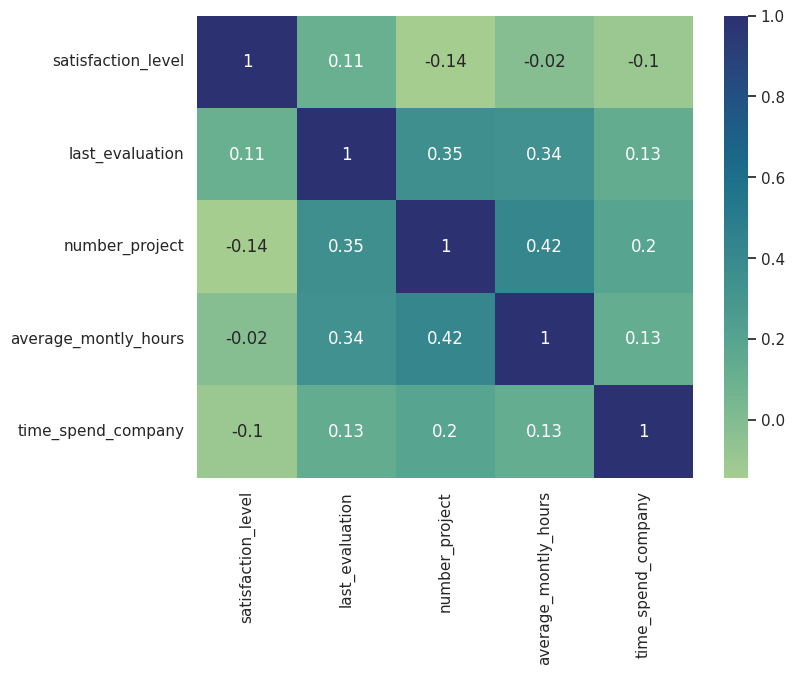

In [ ]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company']].corr(), annot=True, cmap='crest')

Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
 скоррелированные переменные.



самые скоррелированные:

1.   number_project & average_montly_hours
2.   number_project & last_evaluation


наименее скоррелированные переменные:


1.   average_montly_hours & 'satisfaction_level
2.   'satisfaction_level & time_spend_company



#Рассчитайте сколько сотрудников работает в каждом
# департаменте

In [ ]:
df[['department', 'satisfaction_level']].groupby('department').count().reset_index()

,department,satisfaction_level
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


# Показать распределение сотрудников по зарплатам.

(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

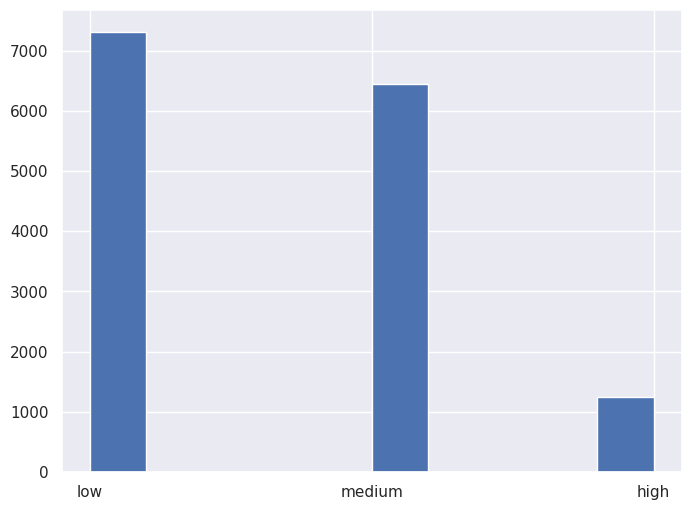

In [ ]:
fig,ax = plt.subplots()
ax.hist(df['salary'])

# Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [ ]:
df_= df[['department', 'salary','satisfaction_level']].groupby(['department','salary']).count()
df_.head()

satisfaction_level
department salary                    
IT         high                    83
           low                    609
           medium                 535
RandD      high                    51
           low                    364

In [ ]:
df

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

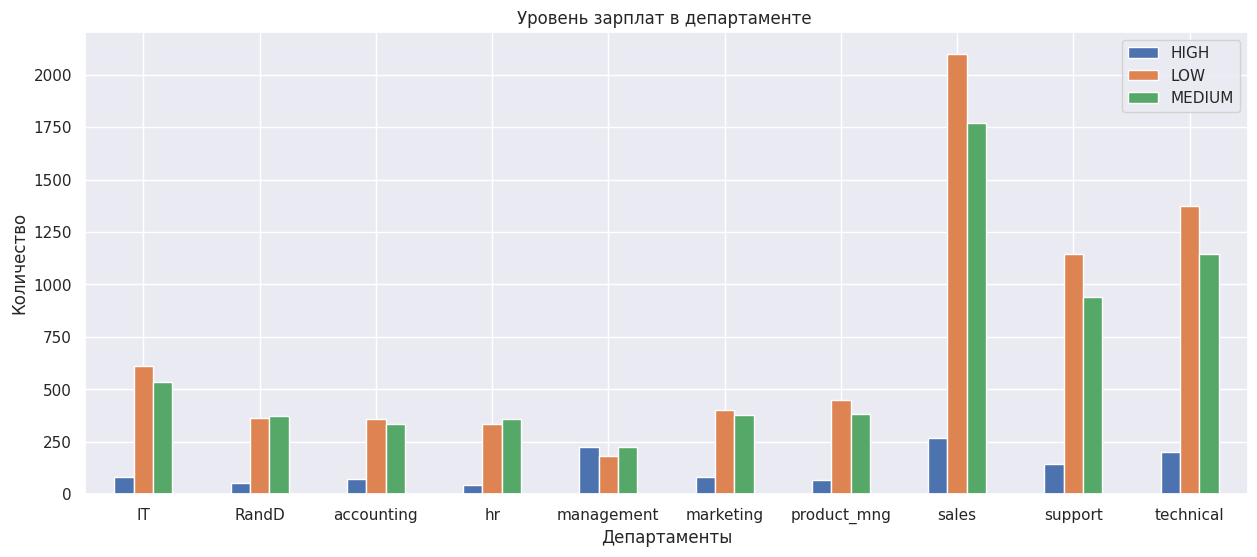

In [ ]:
pd.pivot_table(df_, values='satisfaction_level',
                                index=['department'],
                                columns=['salary']).plot.bar(figsize=(15,6),xlabel = 'Департаменты', ylabel= 'Количество',
                                                          title='Уровень зарплат в департаменте ')
plt.legend(['HIGH','LOW','MEDIUM'])
plt.xticks(rotation=0)

# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
df_1= df[['average_montly_hours','salary']]

Text(0.5, 0, 'Среднее количество часов в месяц')

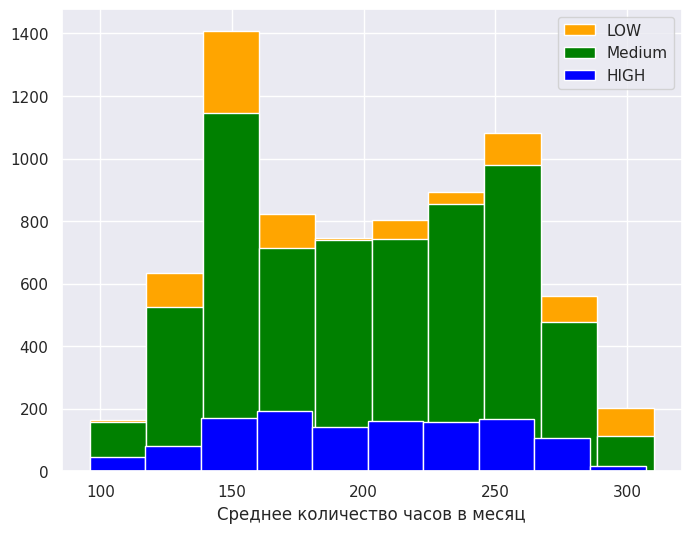

In [ ]:
df_=df_1.loc[(df_1['salary']=='low')]
fig,ax = plt.subplots()
ax.hist(df_['average_montly_hours'], color='orange')
df_=df_1.loc[(df_1['salary']=='medium')]
ax.hist(df_['average_montly_hours'], color='green')
df_=df_1.loc[(df_1['salary']=='high')]
ax.hist(df_['average_montly_hours'], color='blue')
plt.legend(['LOW','Medium','HIGH'])
plt.xlabel('Среднее количество часов в месяц')

In [ ]:
data_low= df_1['average_montly_hours'].loc[(df_1['salary']=='low')].values
data_high= df_1['average_montly_hours'].loc[(df_1['salary']=='high')].values

In [ ]:
data_low

array([157, 223, 159, ..., 143, 280, 158])

In [ ]:
data_high

array([149, 289, 156, ..., 159, 131, 238])

In [ ]:

# H0 - выборки не имеют стат. значимых различий
# H1 - выборки имеют стат. значимые различия
stat, p = stats.ttest_ind(data_low, data_high)
if p > 0.05:
  print("Не отклоняем нулевую гипотезу, средние вероятно одинаковые")
else:
  print("Отклоняем нулевую гипотезу, средние вероятно различные")

Не отклоняем нулевую гипотезу, средние вероятно одинаковые


Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов